ATLANTA COMMUNITY FOOD BANK

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
df=pd.read_csv("datasets/combined/nonprofit_combined.csv")

In [3]:
# print(df.head())
# print(df.columns)
postInfo = df['post_body_text']
postInfo.head()

0    • Medicaid\n• Meals on Wheels [provides meals ...
1    Savannah seniors can access Meals on Wheels fo...
2    SAVANNAH, Ga. (WSAV) - Many senior citizens pr...
3    SAVANNAH, Ga. (WSAV) - Many senior citizens pr...
4    Meals on Wheels is a vital service bringing we...
Name: post_body_text, dtype: object

ONE POSITIVE EXAMPLE
"We are thrilled to introduce and welcome our newest members to the Georgia Hispanic Chamber of Commerce. Together, we’re building a vibrant and supportive community that empowers growth, collaboration, and success!"

In [4]:
analyzer = SentimentIntensityAnalyzer()

def analyze_quote_sentiment(quote):
    # Get the sentiment scores for the given quote
    scores = analyzer.polarity_scores(quote)
    
    # Return the compound score
    return scores['compound']

# Example usage
quote = "We are thrilled to introduce and welcome our newest members to the Georgia Hispanic Chamber of Commerce. Together, we’re building a vibrant and supportive community that empowers growth, collaboration, and success!"
sentiment_score = analyze_quote_sentiment(quote)
print(f"The sentiment score for the quote is: {sentiment_score}")

The sentiment score for the quote is: 0.9523


In [5]:
analyzer = SentimentIntensityAnalyzer()

def analyze_quote_sentiment(quote):
    # Get the sentiment scores for the given quote
    scores = analyzer.polarity_scores(quote)
    
    # Return the compound score
    return scores['compound']

# Example usage
quote = "government"
sentiment_score = analyze_quote_sentiment(quote)
print(f"The sentiment score for the quote is: {sentiment_score}")

The sentiment score for the quote is: 0.0


GETTING SENTIMENT SCORE FOR THE ENTIRE FILE (LINE PER LINE) AND SAVING IT TO A NEW CSV

In [9]:
import csv  # Import csv module for quoting options
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    if isinstance(text, str):  # Ensure input is a string
        scores = analyzer.polarity_scores(text)
        return scores['compound']
    else:
        return None  # Return None for non-text values

# Read the CSV file with proper quoting to handle commas inside strings
input_csv = 'datasets/combined/nonprofit_combined.csv'  # Replace with your input CSV file path
df = pd.read_csv(input_csv, quotechar='"')  # Ensure proper reading of quoted text

# Apply the sentiment analysis to each line in the 'post_body_text' column
df['sentiment'] = df['post_body_text'].apply(get_sentiment_scores)

# Verify the contents of the DataFrame
print(df.head())

# Write the results to a new CSV file with proper quoting for text fields
output_csv = 'datasets/combined/nonprofit_combined_output.csv'  # Replace with your desired output CSV file path
df.to_csv(output_csv, index=False, quoting=csv.QUOTE_ALL)  # Correct quoting usage

# Confirm the file was written
print(f"Output file saved to: {output_csv}")


      PostId                                            PostUrl   
0  425172109  https://bsky.app/profile/jenjams.bsky.social/p...  \
1  356895034  https://twitter.com/newsradiosav/status/185051...   
2  385538438  https://www.facebook.com/newsradiosavannah/pos...   
3  356638075  https://www.facebook.com/100039729025592/posts...   
4  299189598        https://www.youtube.com/watch?v=dQxaZy7kX30   

   PostEngagement        Platform  ChannelID                     ChannelName   
0             NaN         Bluesky   30312579                           Jenny  \
1             NaN         Twitter    9825826              Newsradio Savannah   
2             NaN        Facebook   18542587              Newsradio Savannah   
3             NaN  FacebookDirect   27619355              Newsradio Savannah   
4             NaN         YouTube   24397374  Cherokee County, GA Government   

      ChannelUid     ChannelUrl   
0  blank_for_now  blank_for_now  \
1  blank_for_now  blank_for_now   
2  blank_fo

GETTING A SUMMARIZED SENTIMENT SCORE FOR THE ENTIRE CSV, OTHER DESCRIPTIVE DATA?

Some basic visualizations

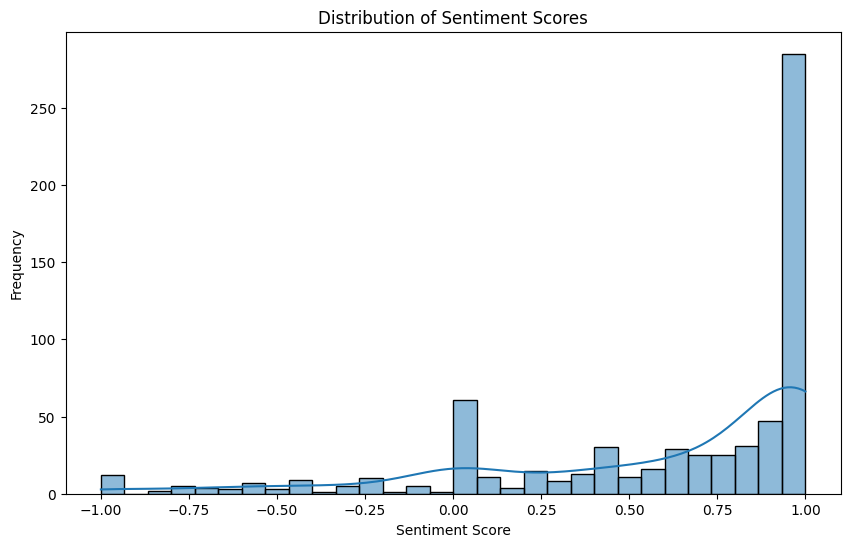

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/combined/nonprofit_combined_output.csv')

# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [12]:
import pandas as pd

# Read data from CSV file
df = pd.read_csv('C:/Users/zeipe/OneDrive/Desktop/QTM151/qtm151spring2025/output_with_sentiment.csv')

# Group by 'Platform' and calculate the average sentiment score for each platform
average_sentiment = df.groupby('Platform')['sentiment'].mean().reset_index()

# Rename columns for clarity
average_sentiment.columns = ['Platform', 'AverageSentimentScore']

print(average_sentiment)


          Platform  AverageSentimentScore
0         Facebook               0.519306
1   FacebookDirect               0.687200
2        Instagram               0.725229
3  InstagramDirect               0.619503
4          Podcast               0.870000
5           Rumble              -0.618800
6         Telegram              -0.421500
7           TikTok              -0.223900
8          Twitter               0.260506
9          YouTube               0.307643
